In [1]:
from pandas import read_csv

In [2]:
detached = read_csv("dataset_detached.csv")
condo = read_csv('dataset_condo.csv')

In [3]:
condo

,Price,Increse_Rate
0,329748,0.0295
1,329000,-0.0236
2,339890,0.0046
3,339900,0.0060
4,341000,0.0007
...,...,...
104,629900,0.0888
105,635000,0.1293
106,630000,0.1378
107,629900,0.1522


In [4]:
detached

,Price,Increse_Rate
0,599450,0.0498
1,667000,0.0287
2,669500,0.0712
3,682000,0.0479
4,660500,0.0231
...,...,...
104,1406500,0.1909
105,1438000,0.2238
106,1437250,0.1904
107,1435000,0.1686


In [5]:
price_detached = detached["Price"]
Increase_rate_detached = detached["Increse_Rate"]
price_data_detached=price_detached.values.tolist()
Increase_rate_data_detached = Increase_rate_detached.values.tolist()

In [6]:
price_condo = condo["Price"]
Increase_rate_condo = condo["Increse_Rate"]
price_data_condo=price_condo.values.tolist()
Increase_rate_data_condo = Increase_rate_condo.values.tolist()

In [7]:
from pandas import Series
from pandas import date_range
idx = date_range('2013-01-01',periods=109,freq='M')
price_ts_detached = Series(price_data_detached, index=idx)
Increase_rate_ts_detached = Series(Increase_rate_data_detached, index=idx)
price_ts_condo = Series(price_data_condo, index=idx)
Increase_rate_ts_condo = Series(Increase_rate_data_condo, index=idx)

In [8]:
Increase_rate_ts_detached

2013-01-31    0.0498
2013-02-28    0.0287
2013-03-31    0.0712
2013-04-30    0.0479
2013-05-31    0.0231
               ...  
2021-09-30    0.1909
2021-10-31    0.2238
2021-11-30    0.1904
2021-12-31    0.1686
2022-01-31    0.1704
Freq: M, Length: 109, dtype: float64

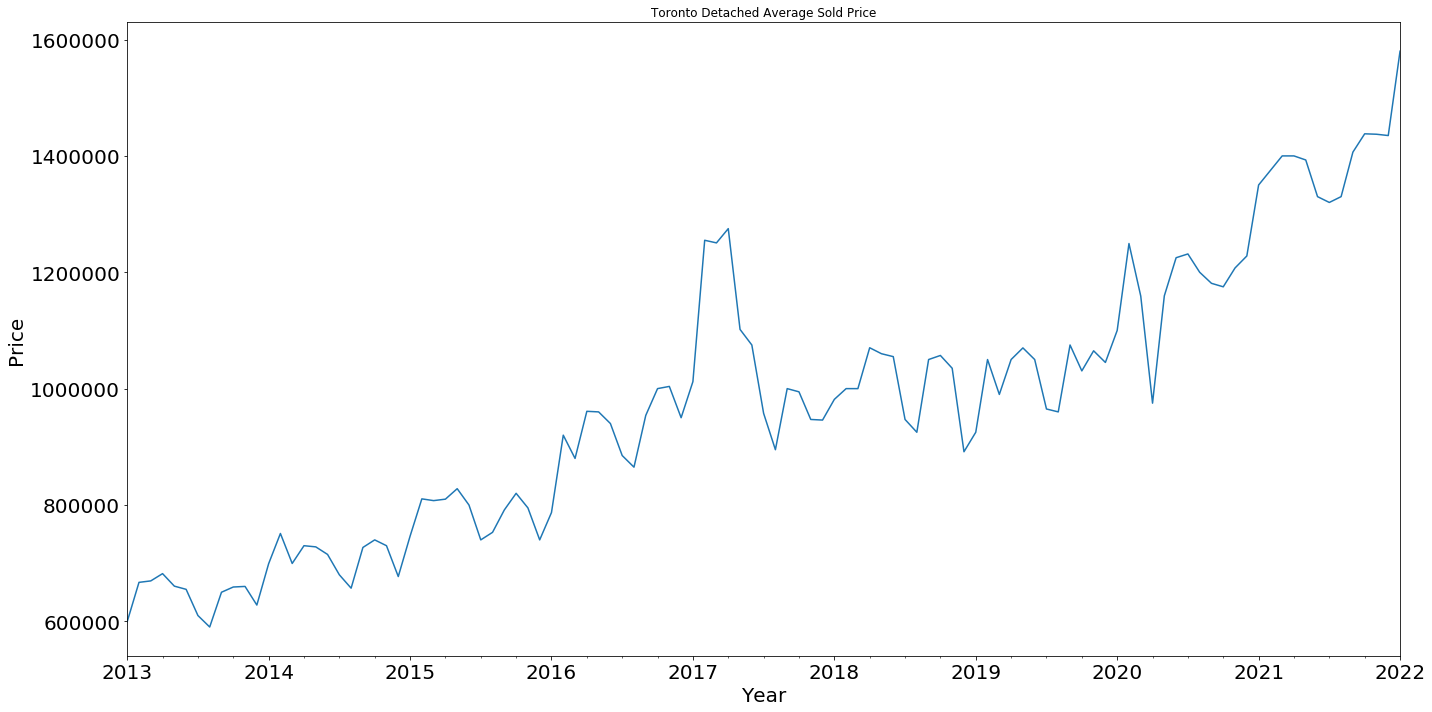

In [10]:
import matplotlib.pyplot as plt
price_ts_detached.plot(title='Toronto Detached Average Sold Price', figsize=(20,10),fontsize=20)  
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price', fontsize=20);
plt.tight_layout()
plt.show()

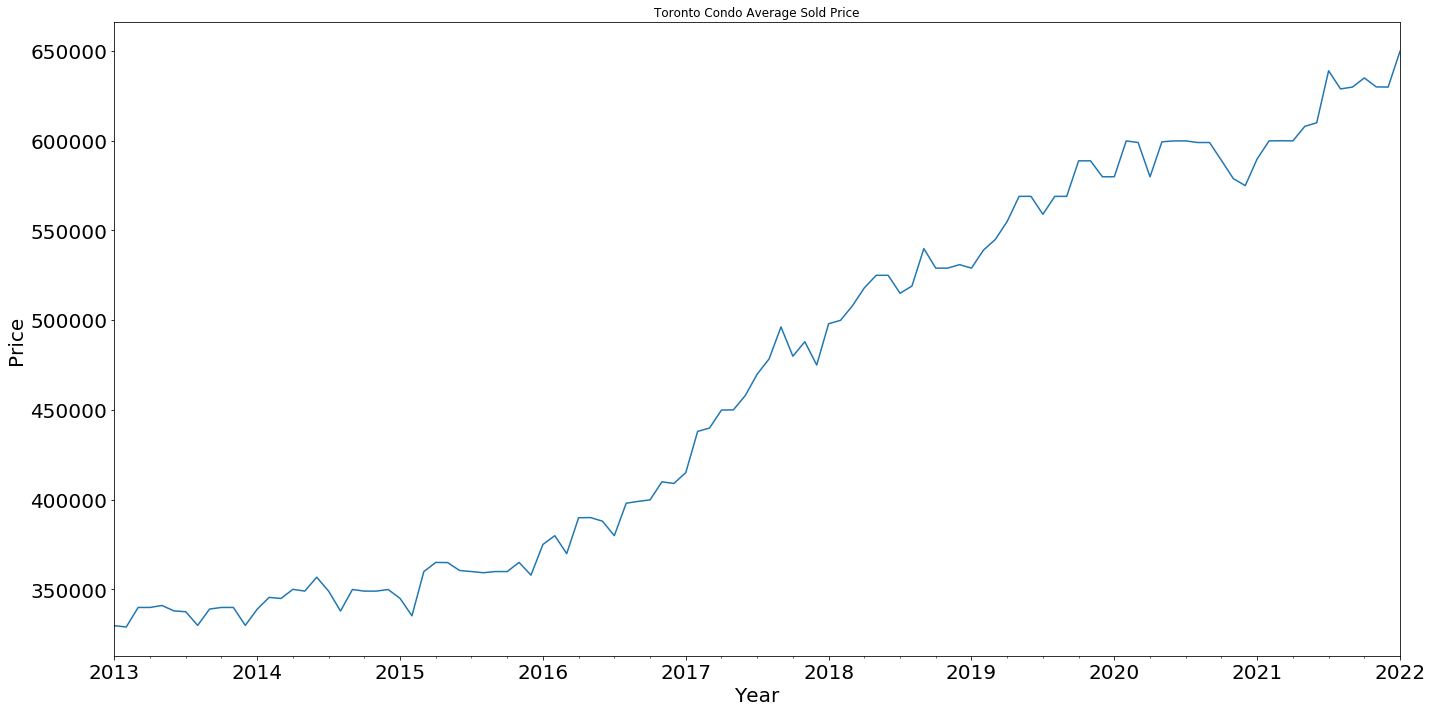

In [11]:

price_ts_condo.plot(title='Toronto Condo Average Sold Price', figsize=(20,10),fontsize=20)  
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price', fontsize=20);
plt.tight_layout()
plt.show()

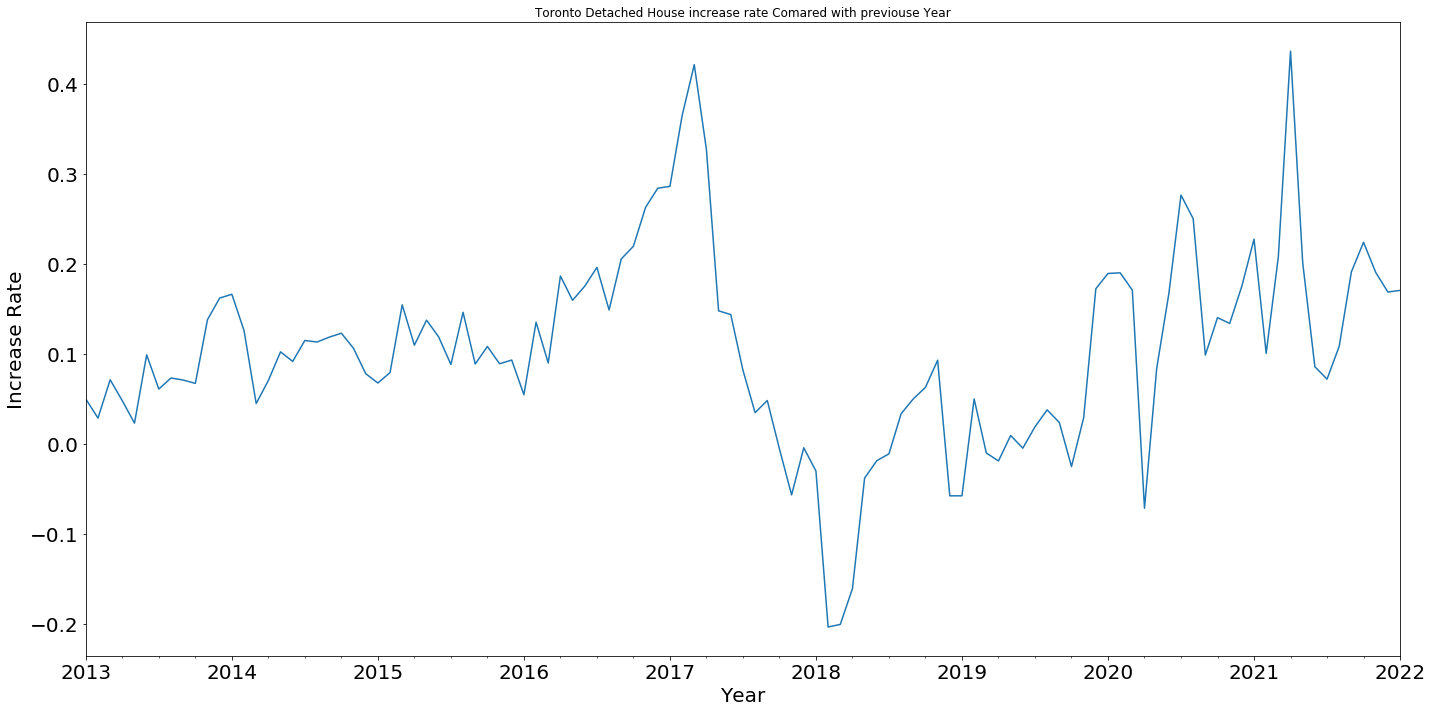

In [12]:
Increase_rate_ts_detached.plot(title='Toronto Detached House increase rate Comared with previouse Year', figsize=(20,10),fontsize=20)  
plt.xlabel('Year', fontsize=20)
plt.ylabel('Increase Rate', fontsize=20);
plt.tight_layout()
plt.show()

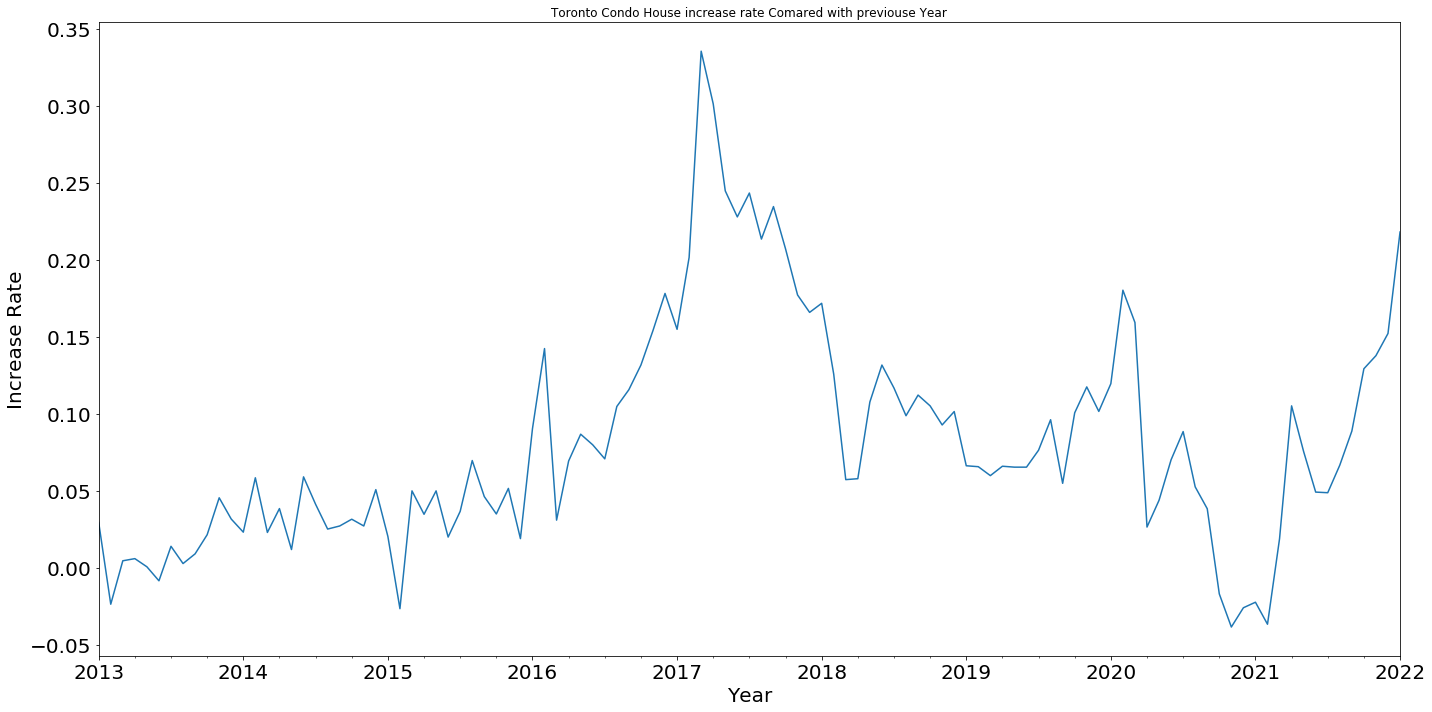

In [13]:
Increase_rate_ts_condo.plot(title='Toronto Condo House increase rate Comared with previouse Year', figsize=(20,10),fontsize=20)  
plt.xlabel('Year', fontsize=20)
plt.ylabel('Increase Rate', fontsize=20);
plt.tight_layout()
plt.show()

In [14]:
# split data into train and test datasets
train_condo = Increase_rate_ts_condo[0:-10]
test_condo = Increase_rate_ts_condo[-10:]

train_detached = Increase_rate_ts_detached[0:-10]
test_detached = Increase_rate_ts_detached[-10:]

In [15]:
train_condo

2013-01-31    0.0295
2013-02-28   -0.0236
2013-03-31    0.0046
2013-04-30    0.0060
2013-05-31    0.0007
               ...  
2020-11-30   -0.0384
2020-12-31   -0.0259
2021-01-31   -0.0223
2021-02-28   -0.0366
2021-03-31    0.0189
Freq: M, Length: 99, dtype: float64

In [16]:
train_detached

2013-01-31    0.0498
2013-02-28    0.0287
2013-03-31    0.0712
2013-04-30    0.0479
2013-05-31    0.0231
               ...  
2020-11-30    0.1337
2020-12-31    0.1751
2021-01-31    0.2273
2021-02-28    0.1005
2021-03-31    0.2079
Freq: M, Length: 99, dtype: float64

In [17]:
# Detached house chose the best difference level
# d = 0
from statsmodels.tsa.stattools import adfuller
detached = train_detached.values
detached = detached.reshape(detached.shape[0])
result_detached = adfuller(detached)
print('ADF Statistic: %f' % result_detached[0])
print('p-value: %f' % result_detached[1])

ADF Statistic: -1.790356
p-value: 0.385260


In [18]:
# deffernce level 1
# d = 1
detached1 = train_detached.diff()
detached1.dropna(inplace=True)

detached1_v = detached1.values
detached1_v = detached1_v.reshape(detached1_v.shape[0])
result_detached1 = adfuller(detached1_v)
print('d = 1 and ADF Statistic Detached: %f' % result_detached1[0])
print('d = 1 and p-value Detached: %f' % result_detached1[1])

d = 1 and ADF Statistic Detached: -3.741358
d = 1 and p-value Detached: 0.003568


In [19]:
# Condos chose the best difference level
# d = 0
condo = train_condo.values
condo = condo.reshape(condo.shape[0])
result_condo = adfuller(condo)
print('d = 0 and ADF Statistic Condo: %f' % result_condo[0])
print('d = 0 and p-value Condo: %f' % result_condo[1])

d = 0 and ADF Statistic Condo: -1.289479
d = 0 and p-value Condo: 0.633972


In [20]:
# Condos deffernce level 1
# d = 1
condo1 = train_condo.diff()
condo1.dropna(inplace=True)

condo1_v = condo1.values
condo1_v = condo1_v.reshape(condo1_v.shape[0])
result_condo1 = adfuller(condo1_v)
print('d = 1 and ADF Statistic Condo: %f' % result_condo1[0])
print('d = 1 and p-value Condo: %f' % result_condo1[1])

d = 1 and ADF Statistic Condo: -3.240554
d = 1 and p-value Condo: 0.017754


In [21]:
# Plot the ACF and PACF with d =1 
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

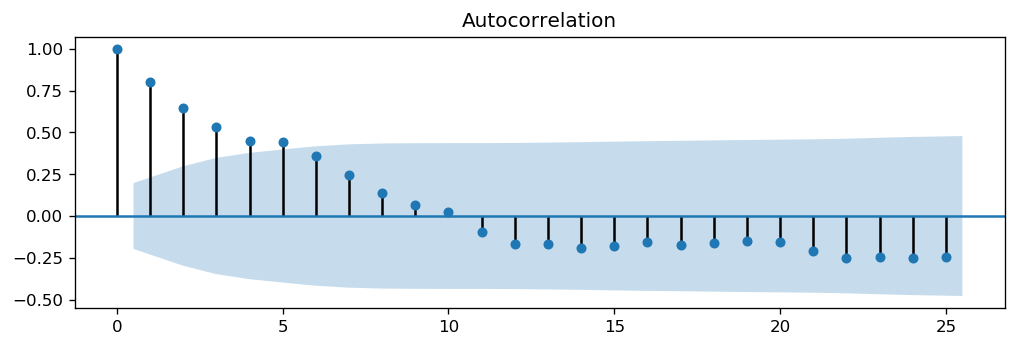

In [22]:
#ACF Detached house
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':120})
train_detached.dropna(inplace=True)
fig = sm.graphics.tsa.plot_acf(train_detached,lags=25)
plt.show()

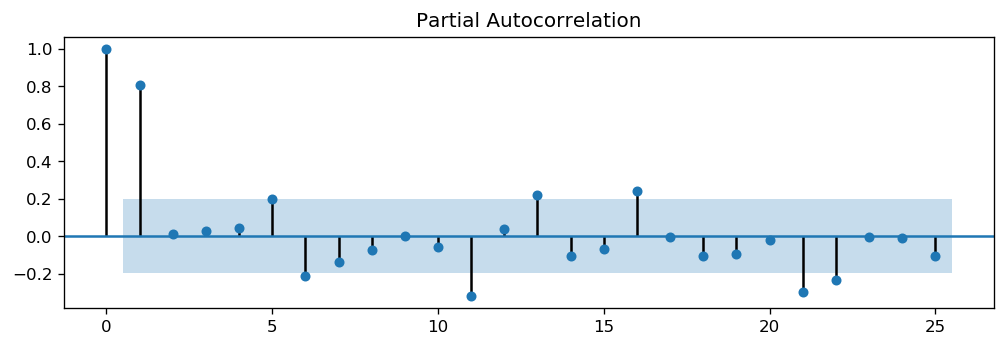

In [23]:
# Detached house PACF
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':120})
train_detached.dropna(inplace=True)
fig = sm.graphics.tsa.plot_pacf(train_detached,lags=25)
plt.show()

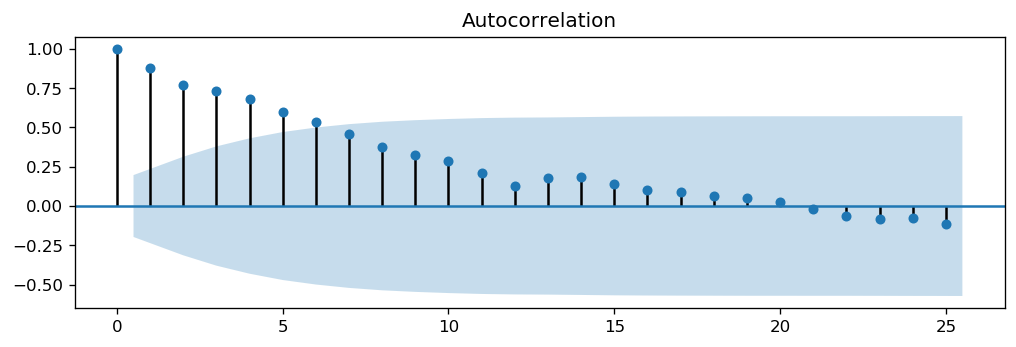

In [24]:
#ACF Condo
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':120})
train_condo.dropna(inplace=True)
fig = sm.graphics.tsa.plot_acf(train_condo,lags=25)
plt.show()

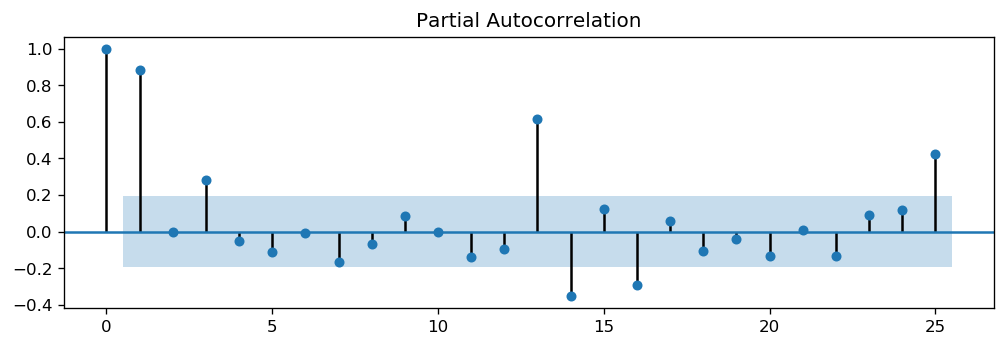

In [25]:
### PACF Condo
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':120})
train_condo.dropna(inplace=True)
fig = sm.graphics.tsa.plot_pacf(train_condo,lags=25)
plt.show()

In [26]:
## Using above the d, p and q to estimate the best model resutle
from statsmodels.tsa.arima_model import ARIMA

In [27]:
### Detached estimate 

# ARIMA Model with p = 1, d = 1, and q = 3
detached_mode113= ARIMA(train_detached.values, order=(1,1,3))
detached_arima_113 = detached_mode113.fit(disp=0)
print(detached_arima_113.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   98
Model:                 ARIMA(1, 1, 3)   Log Likelihood                 131.127
Method:                       css-mle   S.D. of innovations              0.063
Date:                Thu, 03 Mar 2022   AIC                           -250.253
Time:                        22:21:27   BIC                           -234.744
Sample:                             1   HQIC                          -243.980
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.004      0.374      0.709      -0.006       0.009
ar.L1.D.y      0.3625      0.789      0.460      0.646      -1.183       1.908
ma.L1.D.y     -0.4927      0.773     -0.638      0.5

In [28]:
# ARIMA Model with p = 1, d = 1, and q = 4
detached_mode114= ARIMA(train_detached.values, order=(1,1,4))
detached_arima_114 = detached_mode114.fit(disp=0)
print(detached_arima_114.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   98
Model:                 ARIMA(1, 1, 4)   Log Likelihood                 133.603
Method:                       css-mle   S.D. of innovations              0.062
Date:                Thu, 03 Mar 2022   AIC                           -253.206
Time:                        22:21:40   BIC                           -235.111
Sample:                             1   HQIC                          -245.887
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.003      0.431      0.666      -0.005       0.008
ar.L1.D.y     -0.2049      0.244     -0.839      0.401      -0.683       0.274
ma.L1.D.y      0.1331      0.204      0.654      0.5

In [29]:
# ARIMA Model with p = 1, d = 1, and q = 5
detached_mode115= ARIMA(train_detached.values, order=(1,1,5))
detached_arima_115 = detached_mode115.fit(disp=0)
print(detached_arima_115.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   98
Model:                 ARIMA(1, 1, 5)   Log Likelihood                 135.711
Method:                       css-mle   S.D. of innovations              0.058
Date:                Thu, 03 Mar 2022   AIC                           -255.421
Time:                        22:21:50   BIC                           -234.742
Sample:                             1   HQIC                          -247.057
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.010      0.074      0.941      -0.019       0.021
ar.L1.D.y      0.4847      0.101      4.789      0.000       0.286       0.683
ma.L1.D.y     -0.7238      0.101     -7.156      0.0

D:\Programs\anaconda\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [30]:
# ARIMA Model with p = 1, d = 1, and q = 6
detached_mode116= ARIMA(train_detached.values, order=(1,1,6))
detached_arima_116 = detached_mode116.fit(disp=0)
print(detached_arima_116.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   98
Model:                 ARIMA(1, 1, 6)   Log Likelihood                 138.817
Method:                       css-mle   S.D. of innovations              0.057
Date:                Thu, 03 Mar 2022   AIC                           -259.634
Time:                        22:22:11   BIC                           -236.369
Sample:                             1   HQIC                          -250.224
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.009      0.106      0.915      -0.017       0.019
ar.L1.D.y      0.1429      0.187      0.764      0.445      -0.224       0.509
ma.L1.D.y     -0.2839      0.179     -1.587      0.1

D:\Programs\anaconda\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [31]:
# ARIMA Model with p = 2, d = 1, and q = 3
detached_mode213= ARIMA(train_detached.values, order=(2,1,3))
detached_arima_213 = detached_mode213.fit(disp=0)
print(detached_arima_213.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   98
Model:                 ARIMA(2, 1, 3)   Log Likelihood                 133.039
Method:                       css-mle   S.D. of innovations              0.062
Date:                Thu, 03 Mar 2022   AIC                           -252.077
Time:                        22:22:22   BIC                           -233.982
Sample:                             1   HQIC                          -244.758
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.297      0.767      -0.002       0.003
ar.L1.D.y      0.2153      0.327      0.659      0.510      -0.426       0.856
ar.L2.D.y      0.5463      0.243      2.250      0.0

In [32]:
# ARIMA Model with p = 2, d = 1, and q = 4
detached_mode214= ARIMA(train_detached.values, order=(2,1,4))
detached_arima_214 = detached_mode214.fit(disp=0)
print(detached_arima_214.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   98
Model:                 ARIMA(2, 1, 4)   Log Likelihood                 137.678
Method:                       css-mle   S.D. of innovations              0.058
Date:                Thu, 03 Mar 2022   AIC                           -259.357
Time:                        22:22:25   BIC                           -238.677
Sample:                             1   HQIC                          -250.992
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.004      0.366      0.715      -0.006       0.009
ar.L1.D.y     -0.0833      0.135     -0.619      0.536      -0.347       0.180
ar.L2.D.y     -0.6480      0.105     -6.189      0.0

D:\Programs\anaconda\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [33]:
# ARIMA Model with p = 2, d = 1, and q = 5
detached_mode215= ARIMA(train_detached.values, order=(2,1,5))
detached_arima_215 = detached_mode215.fit(disp=0)
print(detached_arima_215.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   98
Model:                 ARIMA(2, 1, 5)   Log Likelihood                 138.326
Method:                       css-mle   S.D. of innovations              0.057
Date:                Thu, 03 Mar 2022   AIC                           -258.651
Time:                        22:22:35   BIC                           -235.387
Sample:                             1   HQIC                          -249.241
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.004      0.330      0.742      -0.007       0.010
ar.L1.D.y      0.0649      0.170      0.382      0.702      -0.268       0.398
ar.L2.D.y     -0.6240      0.113     -5.526      0.0

D:\Programs\anaconda\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [34]:
# ARIMA Model with p = 3, d = 1, and q = 4
detached_mode314= ARIMA(train_detached.values, order=(3,1,4))
detached_arima_314 = detached_mode314.fit(disp=0)
print(detached_arima_314.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   98
Model:                 ARIMA(3, 1, 4)   Log Likelihood                 139.759
Method:                       css-mle   S.D. of innovations              0.057
Date:                Thu, 03 Mar 2022   AIC                           -261.517
Time:                        22:22:48   BIC                           -238.253
Sample:                             1   HQIC                          -252.107
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.004      0.436      0.663      -0.006       0.010
ar.L1.D.y     -0.3019      0.219     -1.380      0.167      -0.731       0.127
ar.L2.D.y     -0.5978      0.097     -6.151      0.0

In [35]:
# ARIMA Model with p = 4, d = 1, and q = 4
detached_mode414= ARIMA(train_detached.values, order=(4,1,4))
detached_arima_414 = detached_mode414.fit(disp=0)
print(detached_arima_414.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   98
Model:                 ARIMA(4, 1, 4)   Log Likelihood                 140.179
Method:                       css-mle   S.D. of innovations              0.056
Date:                Thu, 03 Mar 2022   AIC                           -260.358
Time:                        22:23:15   BIC                           -234.508
Sample:                             1   HQIC                          -249.902
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.005      0.418      0.676      -0.007       0.011
ar.L1.D.y     -0.4626      0.295     -1.566      0.117      -1.041       0.116
ar.L2.D.y     -0.8250      0.258     -3.195      0.0

##### ARIMA Model with p = 3, d = 1, and q = 4 has the lowest AIC and BIC values
##### AIC = -261.517
##### BIC = -238.253

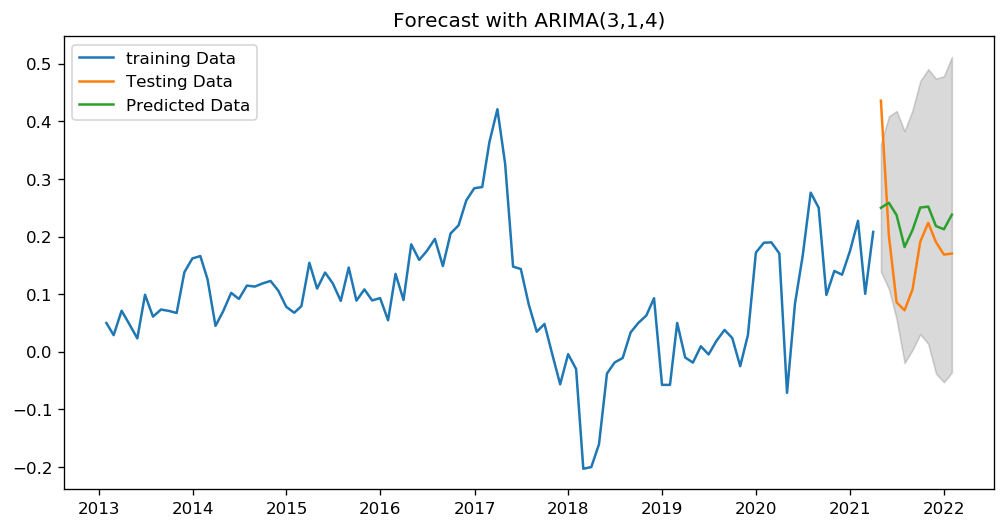

In [37]:
# Forecast for the 10 test dataset
fc, se, conf = detached_arima_314.forecast(10, alpha=0.05)

fc_series = Series(fc, index=test_detached.index)
lower_series = Series(conf[:, 0], index=test_detached.index)
upper_series = Series(conf[:, 1], index=test_detached.index)

plt.figure(figsize=(10,5))
plt.plot(train_detached, label='training Data')
plt.plot(test_detached, label='Testing Data')
plt.plot(fc_series, label='Predicted Data')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast with ARIMA(3,1,4)')
plt.legend(loc='upper left', fontsize=10)
plt.show()

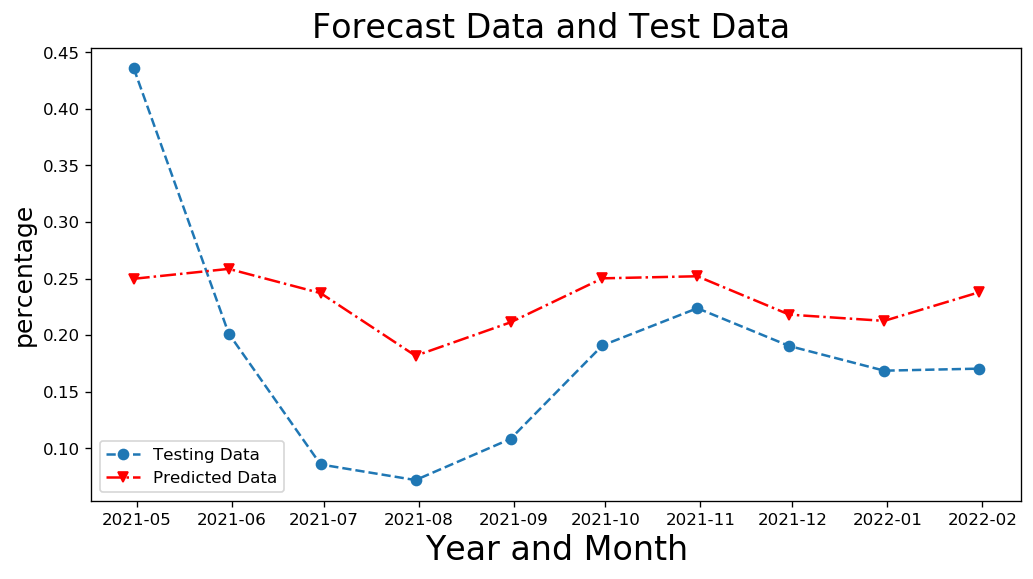

In [38]:
# report performance  ARIMAX(1,1,3) with 6 data points
# Plot the result
fig = plt.figure(figsize=(10,5))
#plt.legend(loc='best',fontsize=20)
plt.xlabel('Year and Month', fontsize=20)
plt.ylabel('percentage', fontsize=15);
plt.title('Forecast Data and Test Data ',fontsize=20)
plt.plot(test_detached,linestyle='--', marker='o', label='Testing Data')
plt.plot(fc_series,linestyle='-.',marker='v',color='r',label='Predicted Data')
plt.legend(loc='lower left', fontsize=10)
plt.show()

In [ ]:
##################################
##################################

In [43]:
### Condo estimate 

# ARIMA Model with p = 1, d = 1, and q = 1
condo_mode111= ARIMA(train_condo.values, order=(1,1,1))
condo_arima_111 = condo_mode111.fit(disp=0)
print(condo_arima_111.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   98
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 188.886
Method:                       css-mle   S.D. of innovations              0.035
Date:                Thu, 03 Mar 2022   AIC                           -369.771
Time:                        22:32:57   BIC                           -359.431
Sample:                             1   HQIC                          -365.589
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.002     -0.057      0.954      -0.005       0.004
ar.L1.D.y      0.3657      0.246      1.487      0.137      -0.116       0.848
ma.L1.D.y     -0.5877      0.204     -2.878      0.0

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [45]:
# ARIMA Model with p = 1, d = 1, and q = 2
condo_mode112= ARIMA(train_condo.values, order=(1,1,2))
condo_arima_112 = condo_mode112.fit(disp=0)
print(condo_arima_112.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   98
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 190.826
Method:                       css-mle   S.D. of innovations              0.034
Date:                Thu, 03 Mar 2022   AIC                           -371.652
Time:                        22:33:31   BIC                           -358.727
Sample:                             1   HQIC                          -366.424
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.002     -0.066      0.948      -0.005       0.004
ar.L1.D.y     -0.1453      0.288     -0.504      0.614      -0.711       0.420
ma.L1.D.y      0.0018      0.269      0.007      0.9

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [46]:
# ARIMA Model with p = 1, d = 1, and q = 3
condo_mode113= ARIMA(train_condo.values, order=(1,1,3))
condo_arima_113 = condo_mode113.fit(disp=0)
print(condo_arima_113.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   98
Model:                 ARIMA(1, 1, 3)   Log Likelihood                 191.965
Method:                       css-mle   S.D. of innovations              0.034
Date:                Thu, 03 Mar 2022   AIC                           -371.930
Time:                        22:34:04   BIC                           -356.420
Sample:                             1   HQIC                          -365.657
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.003     -0.062      0.951      -0.006       0.006
ar.L1.D.y      0.5687      0.199      2.857      0.004       0.179       0.959
ma.L1.D.y     -0.7749      0.214     -3.615      0.0

In [47]:
# ARIMA Model with p = 1, d = 1, and q = 4
condo_mode114= ARIMA(train_condo.values, order=(1,1,4))
condo_arima_114 = condo_mode114.fit(disp=0)
print(condo_arima_114.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   98
Model:                 ARIMA(1, 1, 4)   Log Likelihood                 193.841
Method:                       css-mle   S.D. of innovations              0.033
Date:                Thu, 03 Mar 2022   AIC                           -373.682
Time:                        22:34:24   BIC                           -355.587
Sample:                             1   HQIC                          -366.363
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.003     -0.044      0.965      -0.005       0.005
ar.L1.D.y     -0.6459      0.161     -4.010      0.000      -0.962      -0.330
ma.L1.D.y      0.5226      0.188      2.787      0.0

In [48]:
# ARIMA Model with p = 1, d = 1, and q = 5
condo_mode115= ARIMA(train_condo.values, order=(1,1,5))
condo_arima_115 = condo_mode115.fit(disp=0)
print(condo_arima_115.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [50]:
# ARIMA Model with p = 2, d = 1, and q = 1
condo_mode211= ARIMA(train_condo.values, order=(2,1,1))
condo_arima_211 = condo_mode211.fit(disp=0)
print(condo_arima_211.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   98
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 191.844
Method:                       css-mle   S.D. of innovations              0.034
Date:                Thu, 03 Mar 2022   AIC                           -373.689
Time:                        22:36:23   BIC                           -360.764
Sample:                             1   HQIC                          -368.461
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.002     -0.064      0.949      -0.005       0.004
ar.L1.D.y     -0.0986      0.268     -0.368      0.713      -0.623       0.426
ar.L2.D.y     -0.3108      0.103     -3.028      0.0

In [51]:
# ARIMA Model with p = 2, d = 1, and q = 2
condo_mode212= ARIMA(train_condo.values, order=(2,1,2))
condo_arima_212 = condo_mode212.fit(disp=0)
print(condo_arima_212.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   98
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 191.920
Method:                       css-mle   S.D. of innovations              0.034
Date:                Thu, 03 Mar 2022   AIC                           -371.839
Time:                        22:36:56   BIC                           -356.329
Sample:                             1   HQIC                          -365.566
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.002     -0.060      0.952      -0.005       0.005
ar.L1.D.y     -0.0665      0.322     -0.207      0.836      -0.697       0.564
ar.L2.D.y     -0.3862      0.208     -1.858      0.0

In [52]:
# ARIMA Model with p = 2, d = 1, and q = 3
condo_mode213= ARIMA(train_condo.values, order=(2,1,3))
condo_arima_213 = condo_mode213.fit(disp=0)
print(condo_arima_213.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   98
Model:                 ARIMA(2, 1, 3)   Log Likelihood                 194.694
Method:                       css-mle   S.D. of innovations              0.033
Date:                Thu, 03 Mar 2022   AIC                           -375.387
Time:                        22:37:40   BIC                           -357.292
Sample:                             1   HQIC                          -368.068
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.002     -0.055      0.956      -0.005       0.005
ar.L1.D.y     -0.6682      0.057    -11.648      0.000      -0.781      -0.556
ar.L2.D.y     -0.9110      0.067    -13.668      0.0

In [53]:
# ARIMA Model with p = 2, d = 1, and q = 4
condo_mode214= ARIMA(train_condo.values, order=(2,1,4))
condo_arima_214 = condo_mode214.fit(disp=0)
print(condo_arima_214.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [54]:
# ARIMA Model with p = 3, d = 1, and q = 1
condo_mode311= ARIMA(train_condo.values, order=(3,1,1))
condo_arima_311 = condo_mode311.fit(disp=0)
print(condo_arima_311.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   98
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 192.036
Method:                       css-mle   S.D. of innovations              0.034
Date:                Thu, 03 Mar 2022   AIC                           -372.072
Time:                        22:39:07   BIC                           -356.562
Sample:                             1   HQIC                          -365.799
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.002     -0.065      0.948      -0.005       0.004
ar.L1.D.y     -0.7756      0.367     -2.114      0.035      -1.495      -0.057
ar.L2.D.y     -0.4111      0.129     -3.186      0.0

In [55]:
# ARIMA Model with p = 3, d = 1, and q = 2
condo_mode312= ARIMA(train_condo.values, order=(3,1,2))
condo_arima_312 = condo_mode312.fit(disp=0)
print(condo_arima_312.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   98
Model:                 ARIMA(3, 1, 2)   Log Likelihood                 192.270
Method:                       css-mle   S.D. of innovations              0.034
Date:                Thu, 03 Mar 2022   AIC                           -370.540
Time:                        22:39:29   BIC                           -352.445
Sample:                             1   HQIC                          -363.221
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.002     -0.055      0.956      -0.005       0.005
ar.L1.D.y     -0.9844      0.454     -2.168      0.030      -1.875      -0.094
ar.L2.D.y     -0.6429      0.322     -1.996      0.0

In [56]:
# ARIMA Model with p = 3, d = 1, and q = 3
condo_mode313= ARIMA(train_condo.values, order=(3,1,3))
condo_arima_313 = condo_mode313.fit(disp=0)
print(condo_arima_313.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   98
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 194.868
Method:                       css-mle   S.D. of innovations              0.032
Date:                Thu, 03 Mar 2022   AIC                           -373.736
Time:                        22:39:49   BIC                           -353.056
Sample:                             1   HQIC                          -365.371
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.002     -0.081      0.936      -0.005       0.004
ar.L1.D.y     -0.4486      0.272     -1.650      0.099      -0.981       0.084
ar.L2.D.y     -0.7660      0.194     -3.954      0.0

In [57]:
# ARIMA Model with p = 3, d = 1, and q = 4
condo_mode314= ARIMA(train_condo.values, order=(3,1,4))
condo_arima_314 = condo_mode314.fit(disp=0)
print(condo_arima_314.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   98
Model:                 ARIMA(3, 1, 4)   Log Likelihood                 195.604
Method:                       css-mle   S.D. of innovations              0.032
Date:                Thu, 03 Mar 2022   AIC                           -373.208
Time:                        22:40:10   BIC                           -349.944
Sample:                             1   HQIC                          -363.798
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.001      0.115      0.909      -0.002       0.003
ar.L1.D.y     -0.4796      0.118     -4.071      0.000      -0.710      -0.249
ar.L2.D.y      0.7578      0.075     10.121      0.0

##### ARIMA Model with p = 2, d = 1, and q = 3 has the lowest AIC and BIC values
##### AIC = -375.387
##### BIC = -357.292            

In [ ]:
# ARIMA Model with p = 2, d = 1, and q = 3
condo_mode213= ARIMA(train_condo.values, order=(2,1,3))
condo_arima_213 = condo_mode213.fit(disp=0)
print(condo_arima_213.summary())

In [ ]:
###########

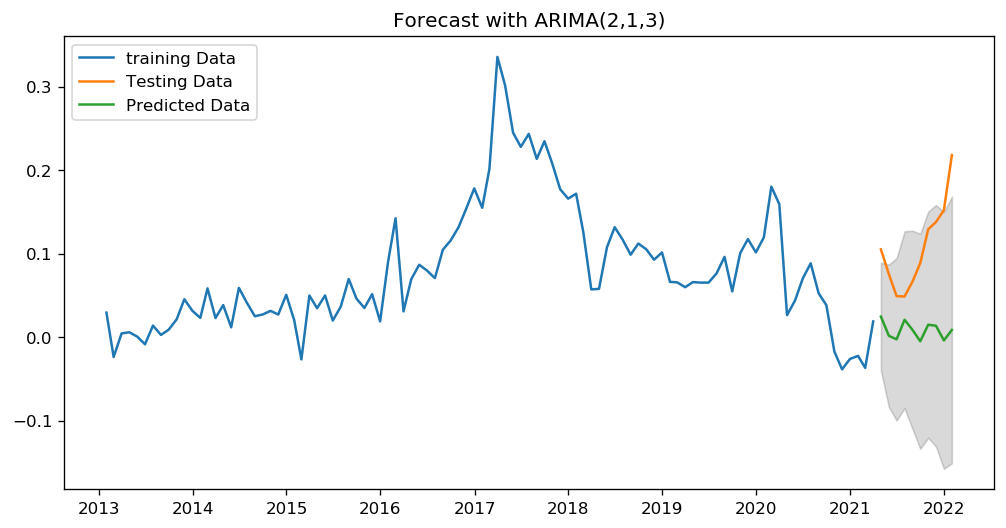

In [79]:
# Forecast for the 10 test Condo data
fc, se, conf = condo_arima_213.forecast(10, alpha=0.05)

fc_series = Series(fc, index=test_condo.index)
lower_series = Series(conf[:, 0], index=test_condo.index)
upper_series = Series(conf[:, 1], index=test_condo.index)

plt.figure(figsize=(10,5))
plt.plot(train_condo, label='training Data')
plt.plot(test_condo, label='Testing Data')
plt.plot(fc_series, label='Predicted Data')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast with ARIMA(2,1,3)')
plt.legend(loc='upper left', fontsize=10)
plt.show()

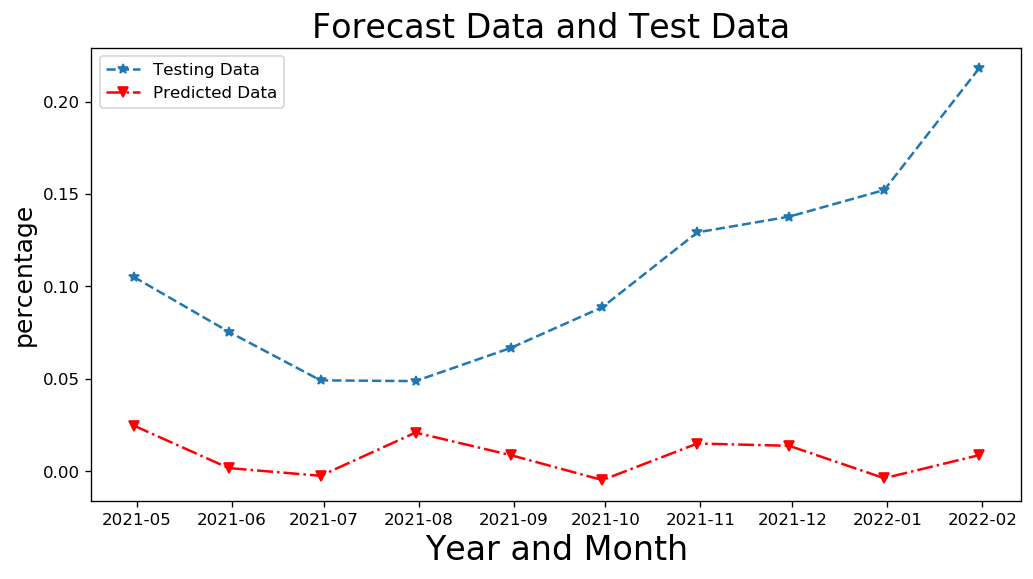

In [81]:
# report performance  ARIMAX(2,1,3) with 10 data points
# Plot the result
fig = plt.figure(figsize=(10,5))
#plt.legend(loc='best',fontsize=20)
plt.xlabel('Year and Month', fontsize=20)
plt.ylabel('percentage', fontsize=15);
plt.title('Forecast Data and Test Data ',fontsize=20)
plt.plot(test_condo,linestyle='--', marker='*', label='Testing Data')
plt.plot(fc_series,linestyle='-.',marker='v',color='r',label='Predicted Data')
plt.legend(loc='upper left', fontsize=10)
plt.show()